In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv("D:\Study\My Tracks\Dr.Eman\german_credit_data.csv")

In [4]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [5]:
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [6]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
data.shape

(1000, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [9]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64

In [12]:
for col in data.select_dtypes(include=object):
    print(f"{col}:{data[col].unique()}")

Sex:['male' 'female']
Housing:['own' 'free' 'rent']
Saving accounts:[nan 'little' 'quite rich' 'rich' 'moderate']
Checking account:['little' 'moderate' nan 'rich']
Purpose:['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [13]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Credit amount'>

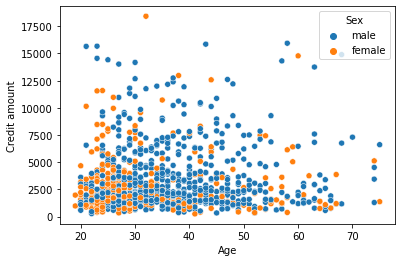

In [18]:
sns.scatterplot(data=data,x="Age",y="Credit amount",hue="Sex")

<AxesSubplot:xlabel='Age', ylabel='Duration'>

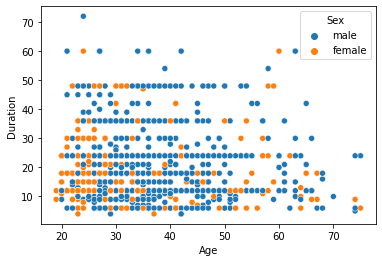

In [19]:
sns.scatterplot(data=data,x="Age",y="Duration",hue="Sex")

<AxesSubplot:xlabel='Credit amount', ylabel='Duration'>

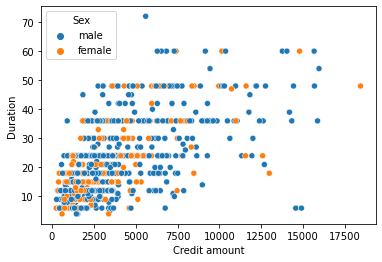

In [20]:
sns.scatterplot(data=data,x="Credit amount",y="Duration",hue="Sex")

In [23]:
x=data.groupby("Purpose")["Credit amount"].count().reset_index()

In [24]:
x

,Purpose,Credit amount
0,business,97
1,car,337
2,domestic appliances,12
3,education,59
4,furniture/equipment,181
5,radio/TV,280
6,repairs,22
7,vacation/others,12


<AxesSubplot:xlabel='Purpose', ylabel='Credit amount'>

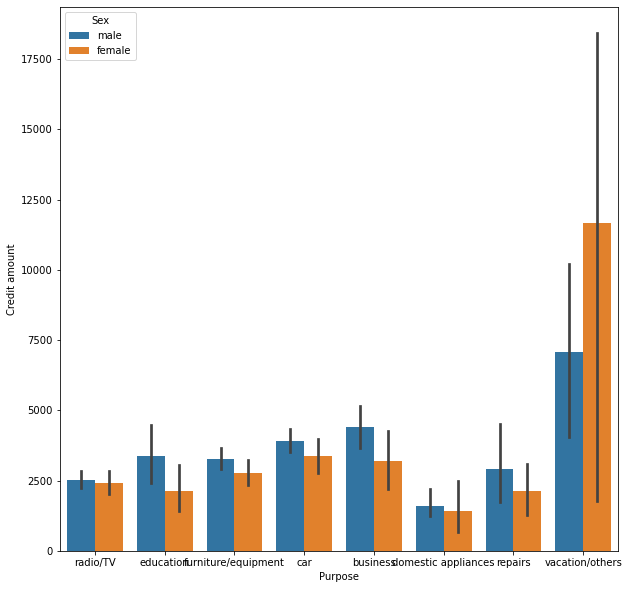

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(data=data,x="Purpose",y="Credit amount",hue="Sex")

<AxesSubplot:xlabel='Age'>

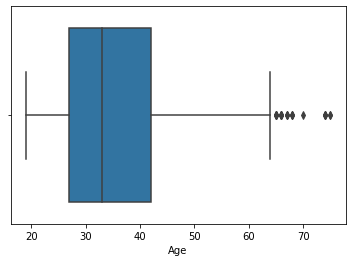

In [29]:
sns.boxplot(data=data,x="Age")

<AxesSubplot:xlabel='Duration', ylabel='Count'>

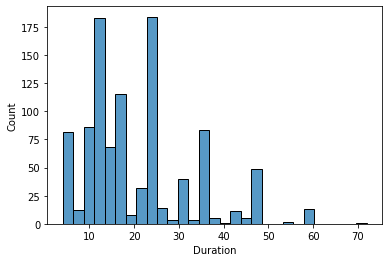

In [31]:
sns.histplot(data=data,x="Duration")

<AxesSubplot:xlabel='Credit amount', ylabel='Count'>

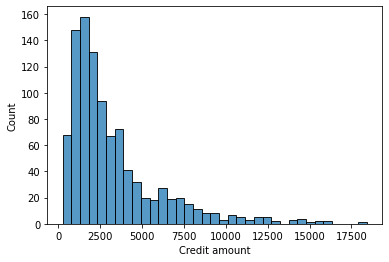

In [32]:
sns.histplot(data=data,x="Credit amount")

<AxesSubplot:xlabel='Duration'>

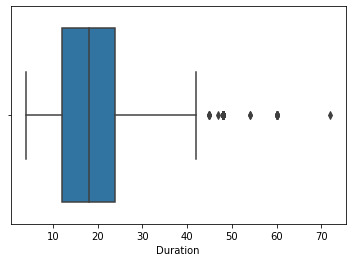

In [33]:
sns.boxplot(data=data,x="Duration")

<AxesSubplot:xlabel='Purpose', ylabel='Credit amount'>

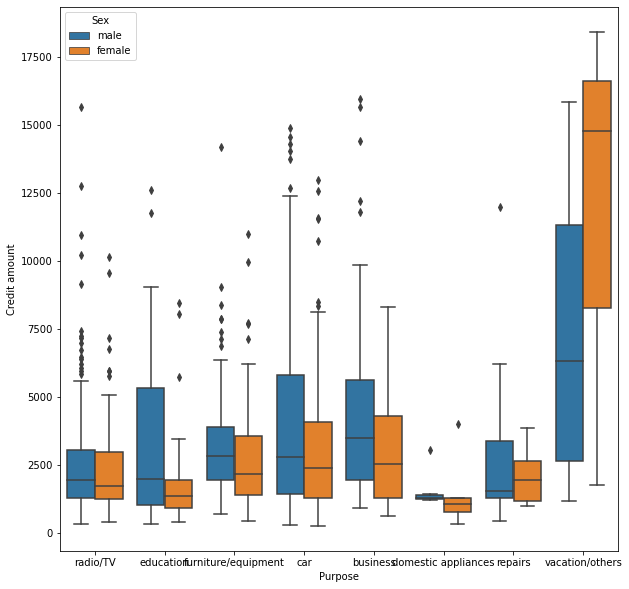

In [36]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x="Purpose",y="Credit amount",hue="Sex")

<AxesSubplot:xlabel='Purpose', ylabel='Duration'>

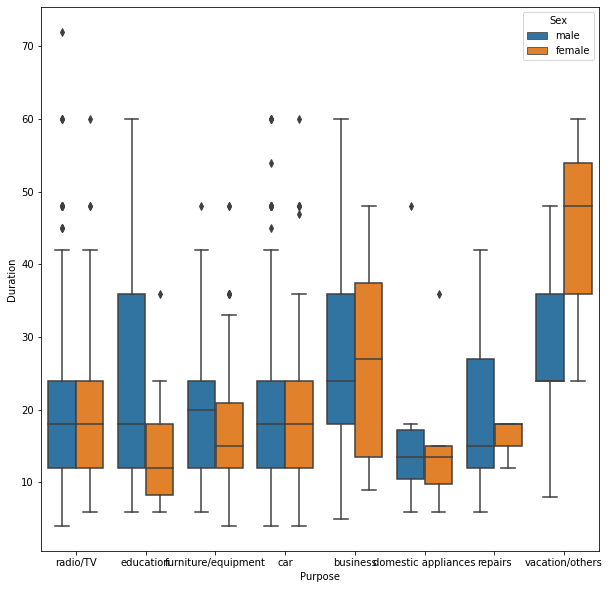

In [37]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x="Purpose",y="Duration",hue="Sex")

<AxesSubplot:xlabel='Job', ylabel='Duration'>

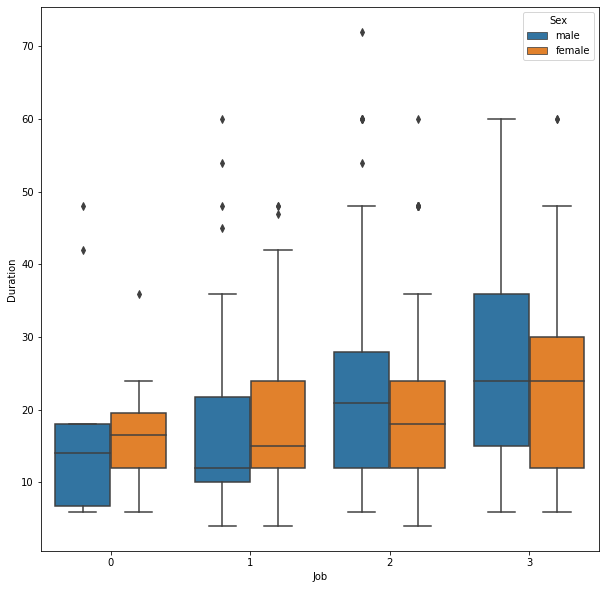

In [39]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x="Job",y="Duration",hue="Sex")

In [40]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [41]:
selected_data=["Age",'Credit amount', 'Duration']
cluster_data=data.loc[:,selected_data]
cluster_data

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


<AxesSubplot:xlabel='Credit amount', ylabel='Count'>

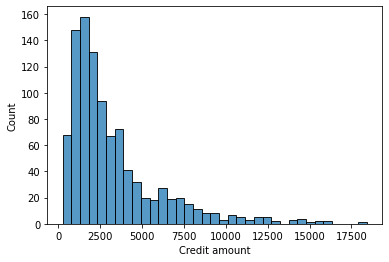

In [42]:
sns.histplot(data=data,x="Credit amount")

In [45]:
cluster_log=np.log(cluster_data)
cluster_log

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054
...,...,...,...
995,3.433987,7.459339,2.484907
996,3.688879,8.257645,3.401197
997,3.637586,6.689599,2.484907
998,3.135494,7.520235,3.806662


<AxesSubplot:xlabel='Credit amount', ylabel='Count'>

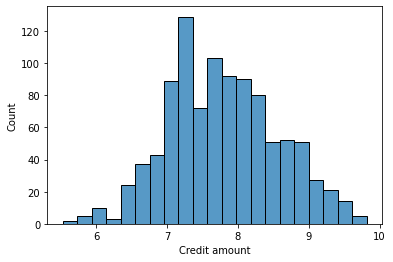

In [47]:
sns.histplot(data=cluster_log,x="Credit amount")

In [48]:
scaler=StandardScaler()
cluster_scaled=scaler.fit_transform(cluster_log)

In [49]:
cluster_scaled

array([[ 2.27100592, -0.933901  , -1.86486906],
       [-1.44615223,  1.16304581,  1.7083687 ],
       [ 1.22669602, -0.1815588 , -0.67378981],
       ...,
       [ 0.37810951, -1.4161991 , -0.67378981],
       [-1.29778048, -0.34591111,  1.59746802],
       [-0.76258638,  0.82450846,  1.59746802]])

C:\Users\Hossam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


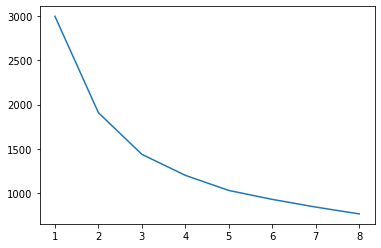

In [55]:
c=[1,2,3,4,5,6,7,8]
sse=[] # sum square error
for i in range(1,9):
    kmeans=KMeans(n_clusters=i).fit(cluster_scaled)
    sse.append(kmeans.inertia_)
plt.plot(c,sse)    

In [56]:
kmean_sel=KMeans(n_clusters=3).fit(cluster_scaled)
labels=pd.DataFrame(kmean_sel.labels_)
labels

,0
0,2
1,0
2,2
3,0
4,0
...,...
995,1
996,0
997,2
998,0


In [58]:
final_data=cluster_data.assign(cluster_data=labels)
final_data

,Age,Credit amount,Duration,cluster_data
0,67,1169,6,2
1,22,5951,48,0
2,49,2096,12,2
3,45,7882,42,0
4,53,4870,24,0
...,...,...,...,...
995,31,1736,12,1
996,40,3857,30,0
997,38,804,12,2
998,23,1845,45,0


In [59]:
final_data.groupby("cluster_data").mean()

,Age,Credit amount,Duration
cluster_data,,,
0,34.042667,5665.384000,32.224000
1,27.784153,1732.199454,14.245902
2,48.691120,1979.745174,13.918919
